In [1]:
import tensorflow as tf

# Для данного действия важно чтобы TensorFlow был не ниже версии 2.0
# Проверим версию
print(tf.__version__)


2.2.0


In [2]:
import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image
import time
import functools

In [3]:
# Функция перевода изобржения к одному размеру
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

In [4]:
# Загрузка изображения для изменения
import os

# Загрузим изображение для стилизации, например бросок знаменитый бросок Джордана в серии с Ютой
content_path = 'Djordan.jpg'

# Загрузим изображение донор для осущсвления стилизации,
# Я выбрал одну из самых фундаментльных работ Ильи Репина
style_path = 'YUbileynoe-zasedanie-gosudarstvennogo-soveta.jpg'


In [5]:
# Функция загрузки изображения
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

In [6]:
# Функция отображения изображения
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

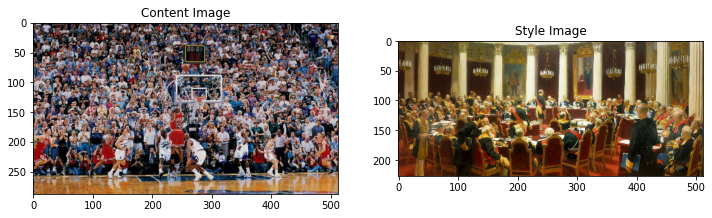

In [7]:
import cv2


content_image = load_img(content_path)
style_image = load_img(style_path)

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

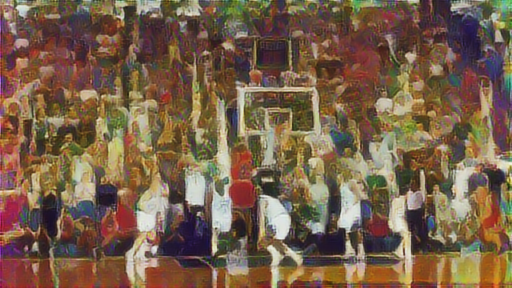

In [8]:
import tensorflow_hub as hub
# Поменяем стиль изображения для этого испльзуем предобученную нейронную сеть из библиотеки tf
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/1')
stylized_image = hub_module(tf.constant(content_image), tf.constant(style_image))[0]
# Выведем изображение
tensor_to_image(stylized_image)